# Data Wrangling Project

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
} 

<IPython.core.display.Javascript object>

In [2]:
#initialization of Libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from numpy import set_printoptions
from sklearn import metrics as m
import warnings
warnings.filterwarnings('ignore')

# Part 1: Data Cleaning

In [3]:
#Loading the Dataset
file = pd.read_csv('c://Users/User/Documents/IMPORTANT FILES/DATA WRANGLING PROJECT/Muskets_teamData_V2.csv') 

In [4]:
#Inspecting the Dataset - peeking used .head
print(file.head(5))
print('_'*60)

print(file.tail(5) )

       ID               Name                      LongName  \
0  158023           L. Messi                  Lionel Messi   
1   20801  Cristiano Ronaldo  C. Ronaldo dos Santos Aveiro   
2  200389           J. Oblak                     Jan Oblak   
3  192985       K. De Bruyne               Kevin De Bruyne   
4  190871          Neymar Jr    Neymar da Silva Santos Jr.   

                                           photoUrl  \
0  https://cdn.sofifa.com/players/158/023/21_60.png   
1  https://cdn.sofifa.com/players/020/801/21_60.png   
2  https://cdn.sofifa.com/players/200/389/21_60.png   
3  https://cdn.sofifa.com/players/192/985/21_60.png   
4  https://cdn.sofifa.com/players/190/871/21_60.png   

                                           playerUrl Nationality  Age  ↓OVA  \
0  http://sofifa.com/player/158023/lionel-messi/2...   Argentina   33  93.0   
1  http://sofifa.com/player/20801/c-ronaldo-dos-s...    Portugal   35  92.0   
2  http://sofifa.com/player/200389/jan-oblak/210006/    Slo

In [5]:
#Checking the Shape of the Dataset
file.shape 

(19021, 77)

In [6]:
#Inspecting Overall Data type
file.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19021 entries, 0 to 19020
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19021 non-null  int64  
 1   Name              19021 non-null  object 
 2   LongName          19021 non-null  object 
 3   photoUrl          19021 non-null  object 
 4   playerUrl         19021 non-null  object 
 5   Nationality       19021 non-null  object 
 6   Age               19021 non-null  int64  
 7   ↓OVA              19019 non-null  float64
 8   POT               19020 non-null  float64
 9   Club              19021 non-null  object 
 10  Contract          19021 non-null  object 
 11  Positions         19021 non-null  object 
 12  Height            19021 non-null  object 
 13  Weight            19020 non-null  object 
 14  Preferred Foot    19021 non-null  object 
 15  BOV               19021 non-null  int64  
 16  Best Position     19021 non-null  object

In [7]:
#Extracting a copy of the dataset into a new dataframe
dfCopy = file.copy() 

In [8]:
#Counting Unique values in each columns
cols = dfCopy.columns
for col in cols:
    print(f'Column Name: {col} ')
    print(f'Number of Unique Value: {dfCopy[col].nunique()}')
    print('-'*60)

Column Name: ID 
Number of Unique Value: 18979
------------------------------------------------------------
Column Name: Name 
Number of Unique Value: 17920
------------------------------------------------------------
Column Name: LongName 
Number of Unique Value: 18852
------------------------------------------------------------
Column Name: photoUrl 
Number of Unique Value: 18979
------------------------------------------------------------
Column Name: playerUrl 
Number of Unique Value: 18979
------------------------------------------------------------
Column Name: Nationality 
Number of Unique Value: 164
------------------------------------------------------------
Column Name: Age 
Number of Unique Value: 29
------------------------------------------------------------
Column Name: ↓OVA 
Number of Unique Value: 47
------------------------------------------------------------
Column Name: POT 
Number of Unique Value: 48
------------------------------------------------------------
Colum

In [9]:
#SubTask1: Extracting the names of the players from playerurl to Player Name Column
playerName = list()
for name in dfCopy.playerUrl.values:
    vals = name.split('/')
    newVals = vals[-3].split('-') 
    nameEx = ' '.join(newVals)
    playerName.append(nameEx.title()) 

#Creating and assigning the new Player Name columns
dfCopy['Player Name'] = playerName 

In [10]:
#Subtask2: code to categorize the value under the contract columns into Active, On Loan or Free
playerStatus = list()
for player in dfCopy.Contract.values:
    if 'Free' in player:
        playerStatus.append('Free')
    elif 'On Loan' in player:
        playerStatus.append('On Loan')
    else:
        playerStatus.append('Active')

#Creating a new column called Player Status
dfCopy['Player Status'] = playerStatus

In [11]:
#subtask3: Unpacking the position columns

positionList = []
for pos in dfCopy.Positions:
    if ',' in pos: 
        pList = pos.split(',')
        playPos = [x.strip() for x in pList]
        positionList.extend(playPos)

    else:
        pos.strip()
        positionList.append(pos) 

#Selecting the Unique values
uniquePos = list(set(positionList))

#Assigning a Boolean value based on the player position
newPosition = []

for positions in dfCopy.Positions.values:
    posTable = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    for p in uniquePos:
        if p in positions:
            Pidx = uniquePos.index(p)
            posTable[Pidx] = 1
    newPosition.append(posTable) 

playPos = [(pos +'_Play Position') for pos in uniquePos]
#Merging it into the Original Dataframe
posDf = pd.DataFrame(newPosition, columns = playPos) 

#Assigning Back to the Original Dataframe
dfPure = dfCopy.join(posDf)   

In [12]:
#Subtask 4.1: Inspecting and correcting the Weight Columns
weightList = list()
for weight in dfPure.Weight.values:
    weight = str(weight)
    if 'kg' in weight:
        newW = (float(weight[:-2]))
        weightList.append(int(newW))
    elif 'lbs' in weight:
        newW = float(weight[:-3])*0.453592  #Converting to kg
        weightList.append(int(newW))
    else:
        weightList.append(weight)

#Replacing the original value of weight with the weight list
dfPure['Weight'] = weightList 

In [13]:
#subtask 4.2: Inspecting and correcting the height columns
heightList = list()
tempList = list() 
for hgt in dfPure.Height:
    if 'cm' not in hgt:
        tempList.append(hgt)
htgList = list(set(tempList))

for height in dfPure.Height.values:
    if 'cm' in height:
        heightList.append(float(height[:-2]))
    elif height in htgList:
        feet = height[0]
        inch = height[-3:-1] 
        if "'" in inch:
            inch1 = inch[1]
            nHgt = float(feet)*30.48 + float(inch1)*2.54
            heightList.append(round((nHgt),1)) 
        else:
            nHgt = float(feet)*30.48 + float(inch)*2.54
            heightList.append(round((nHgt),1))
            
    else:
        heightList.append(height) 
        
#Adding the new value of Height to the Dataframe
dfPure['Height'] = heightList 

In [14]:
#Subtask 4.3 Cleaning the W/F, SM and IR columns

#Function to clean each columns
def cleaner(feat):
    valList = list()
    for val in dfPure[feat].values:
        valList.append(int(val[0]))
    return valList

wfList = cleaner('W/F') 
smList = cleaner('SM')
irList = cleaner('IR')

#Adding the value to the Original Dataframe
dfPure['W/F'] = wfList
dfPure['SM'] = smList
dfPure['IR'] = irList

In [15]:
#Subtask 5, Dealing with the Wage, Value and Release Clause column   

#Function 1
def filtering(feat, const, unit1, unit2) :
    valList = list()
    for val in dfPure[feat].values:
        val = str(val) 
        if const and unit1 in val:
            val = float(val[1:-1])*1000000
            valList.append(val)
        elif const and unit2 in val:
            val = float(val[1:-1])*1000
            valList.append(val)
        elif const in val:
            valList.append(float(val[1:]))
        else:
            valList.append(float(val)) 
    return valList
#function 2
def filtering2(feat, unit):
    valList = list()
    for val in dfPure[feat].values:
        if unit in val:
            val = float(val[1:-1])*1000
            valList.append(val)
        else:
            valList.append(float(val[1:])*1000)
    return valList

#Call to functions
wageList = filtering2('Wage','K')
valueList = filtering('Value', '€','M','K') 
rcList = filtering('Release Clause','€','M','K')

#Reassigning the value of Value, Wage and Release Clause
dfPure['Wage'] = wageList
dfPure['Value'] = valueList
dfPure['Release Clause'] = rcList

In [16]:
#Inspecting and Correcting the Hits Columns
hitList = []
for val in dfPure.Hits:
    val = str(val)
    if 'K' in val:
        val = float(val[:-1])*1000
        hitList.append(val)
    elif val.isnumeric():
        hitList.append(float(val))
    else:
        hitList.append('nan')
#Reassigning the value of Hits Columns
dfPure['Hits'] = hitList  

# Initial Data Preprocessing

# Data Mis-match

In [17]:
#Data MisMatch: Cleaning the Dribbling and Short Passing columns
dfCopy = dfPure.copy() 
def filtering3(feat):
    temList = list()
    for sp in dfCopy[feat].values: 
        sp = str(sp) 
        if '_' in sp:
            sp = sp[:-2] 
            temList.append(float(sp)) 
        else:
            temList.append(float(sp)) 
    return temList

shortPass = filtering3('Short Passing')
dribbling = filtering3('Dribbling')
#Appending the values to the dataframe
dfCopy['Short Passing'] = shortPass 
dfCopy['Dribbling'] = dribbling 

In [18]:
#Correcting the Weight and Release Clause columns by replacing all nans with np.NaN
dfCopy['Weight'] = dfCopy['Weight'].replace(['nan'],[np.NaN]) 
dfCopy['Release Clause'] = dfCopy['Release Clause'].replace(['nan'],[np.NaN]) 
dfCopy['Hits'] = dfCopy['Hits'].astype('float')

In [19]:
#Converting the Height column from Float to int
dfCopy['Height'] = dfCopy['Height'].astype('int64')

# Dropping Irrevelant Columns

Justification:

The ID, name, LongName, PhotoUrl,playerUrl, Club, Nationality and Loan Date End columns were drop because there have no direct relationship or attributive 
relationship with the outcome variable.
The Position and Contract columns were dropped because their values has been extracted and placed on a different columns.

In [20]:
dfCopy.drop(['ID', 'Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality','Club', 'Contract', 'Positions',
             'Loan Date End','Joined', 'Player Name'], axis=1, inplace=True)

# EDA - Exploratory Data Analysis

In [21]:
#Data Structure

dfCopy.shape

(19021, 82)

# Visualizing the Data Distribution

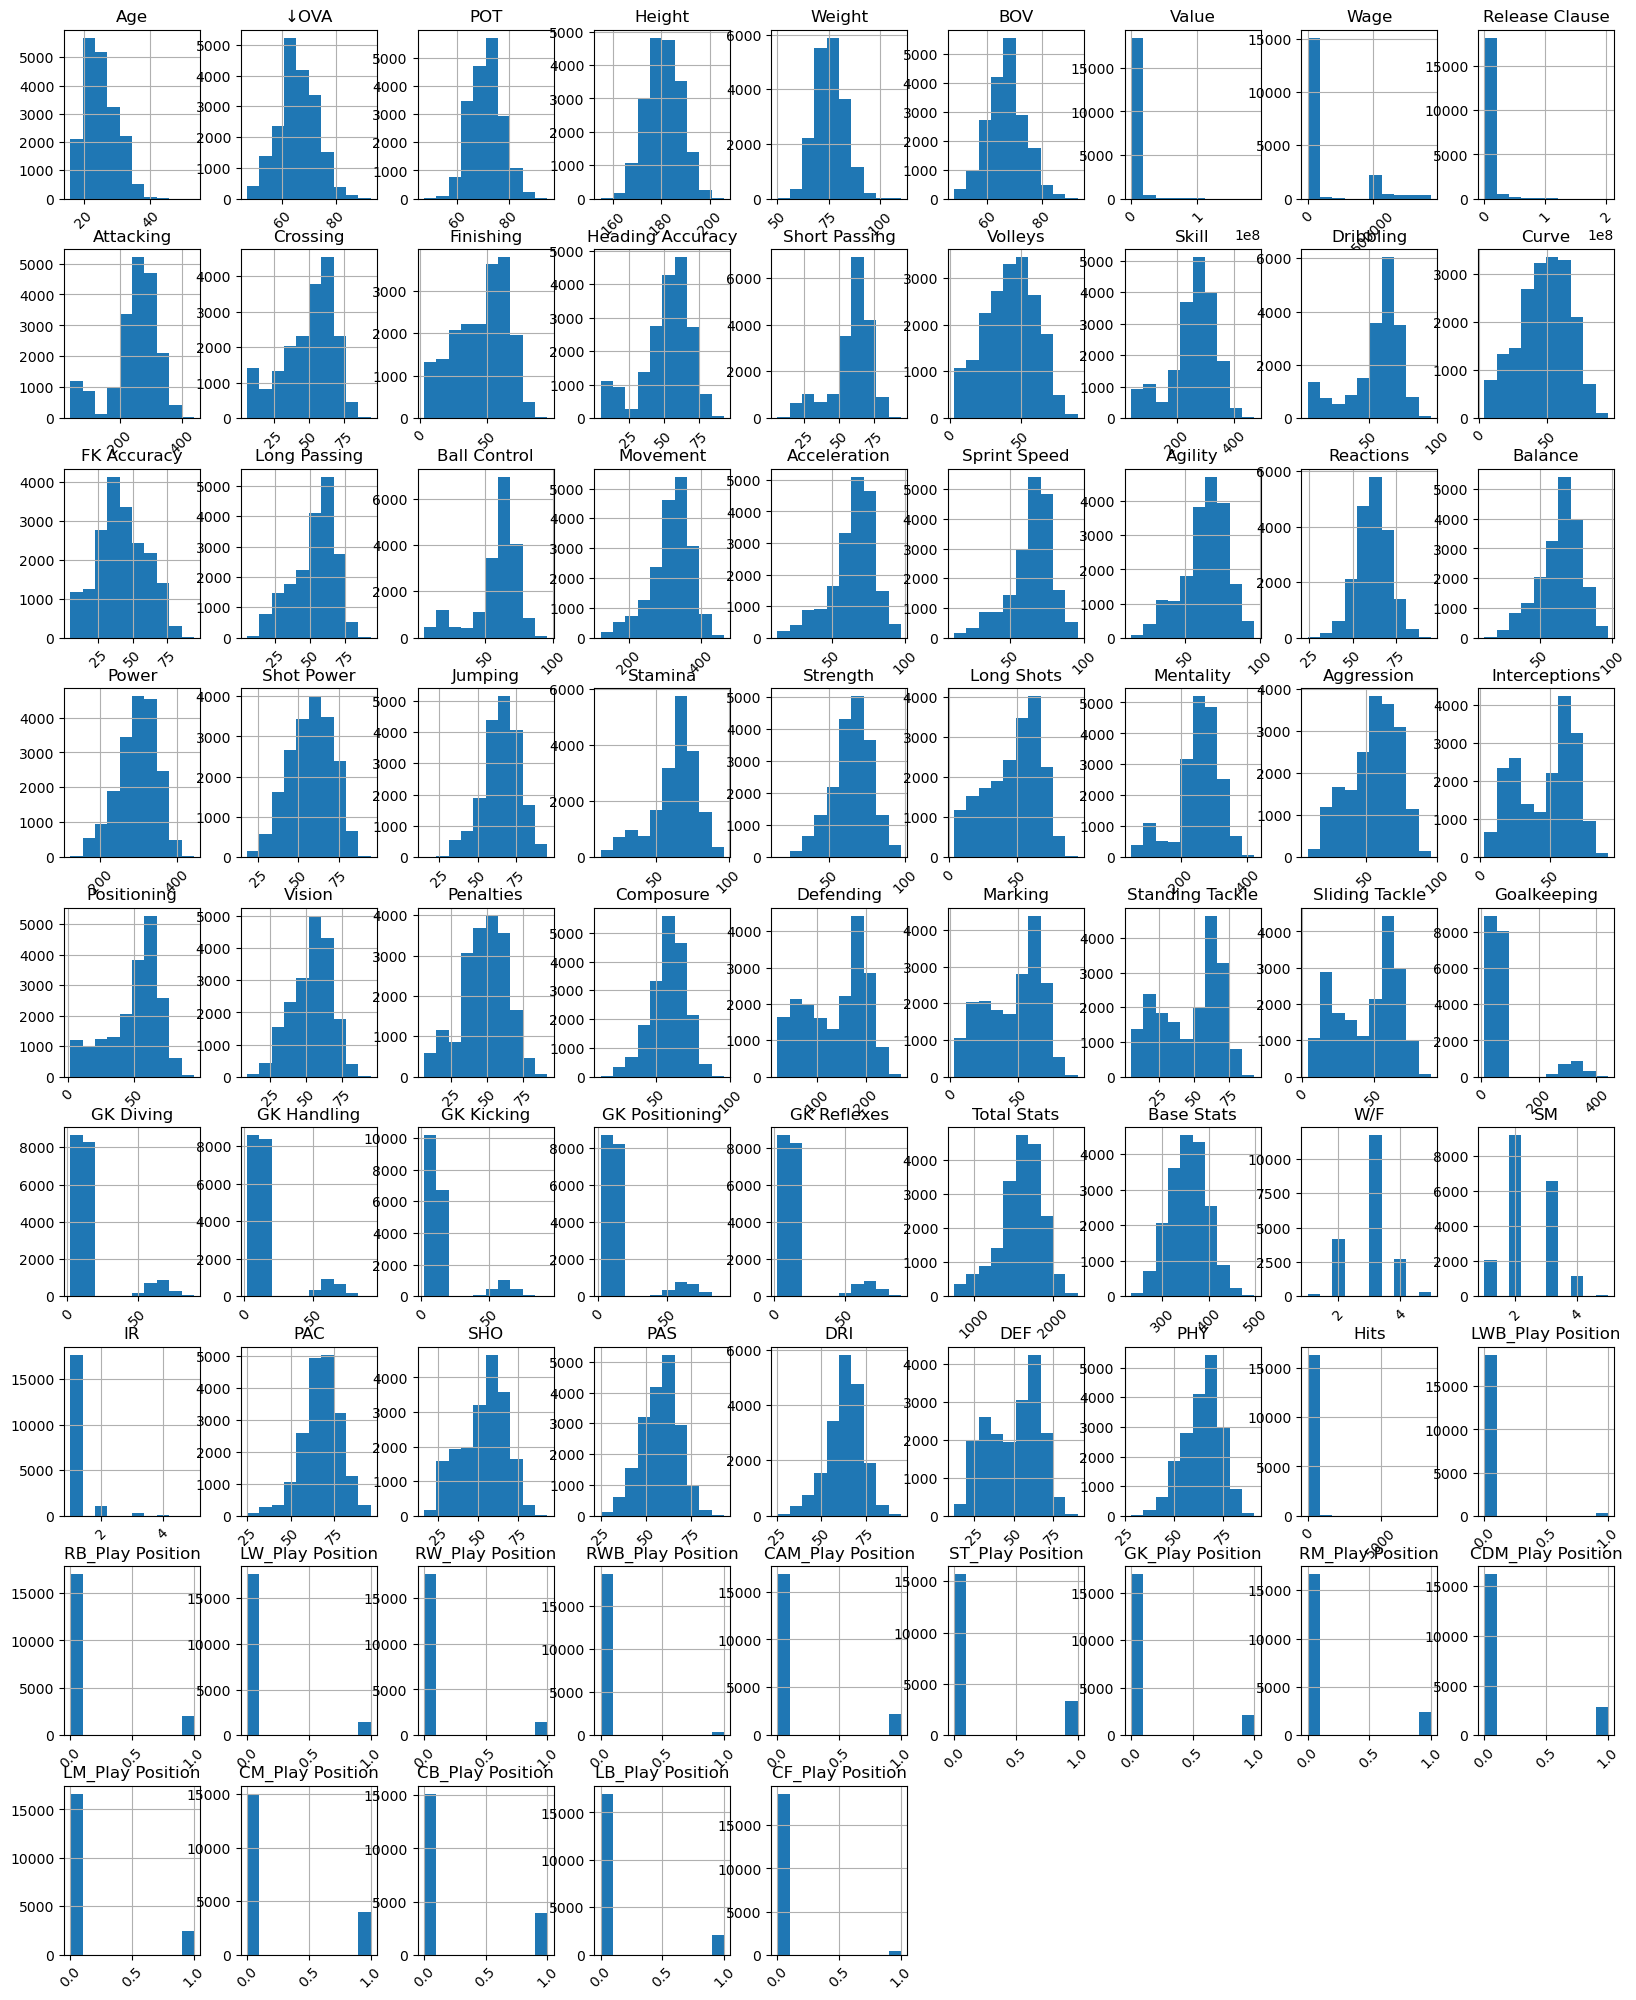

In [22]:
#Plotting Histogram of the Dataset

dfCopy.hist(figsize=(20,25), xrot=45) 
plt.show()

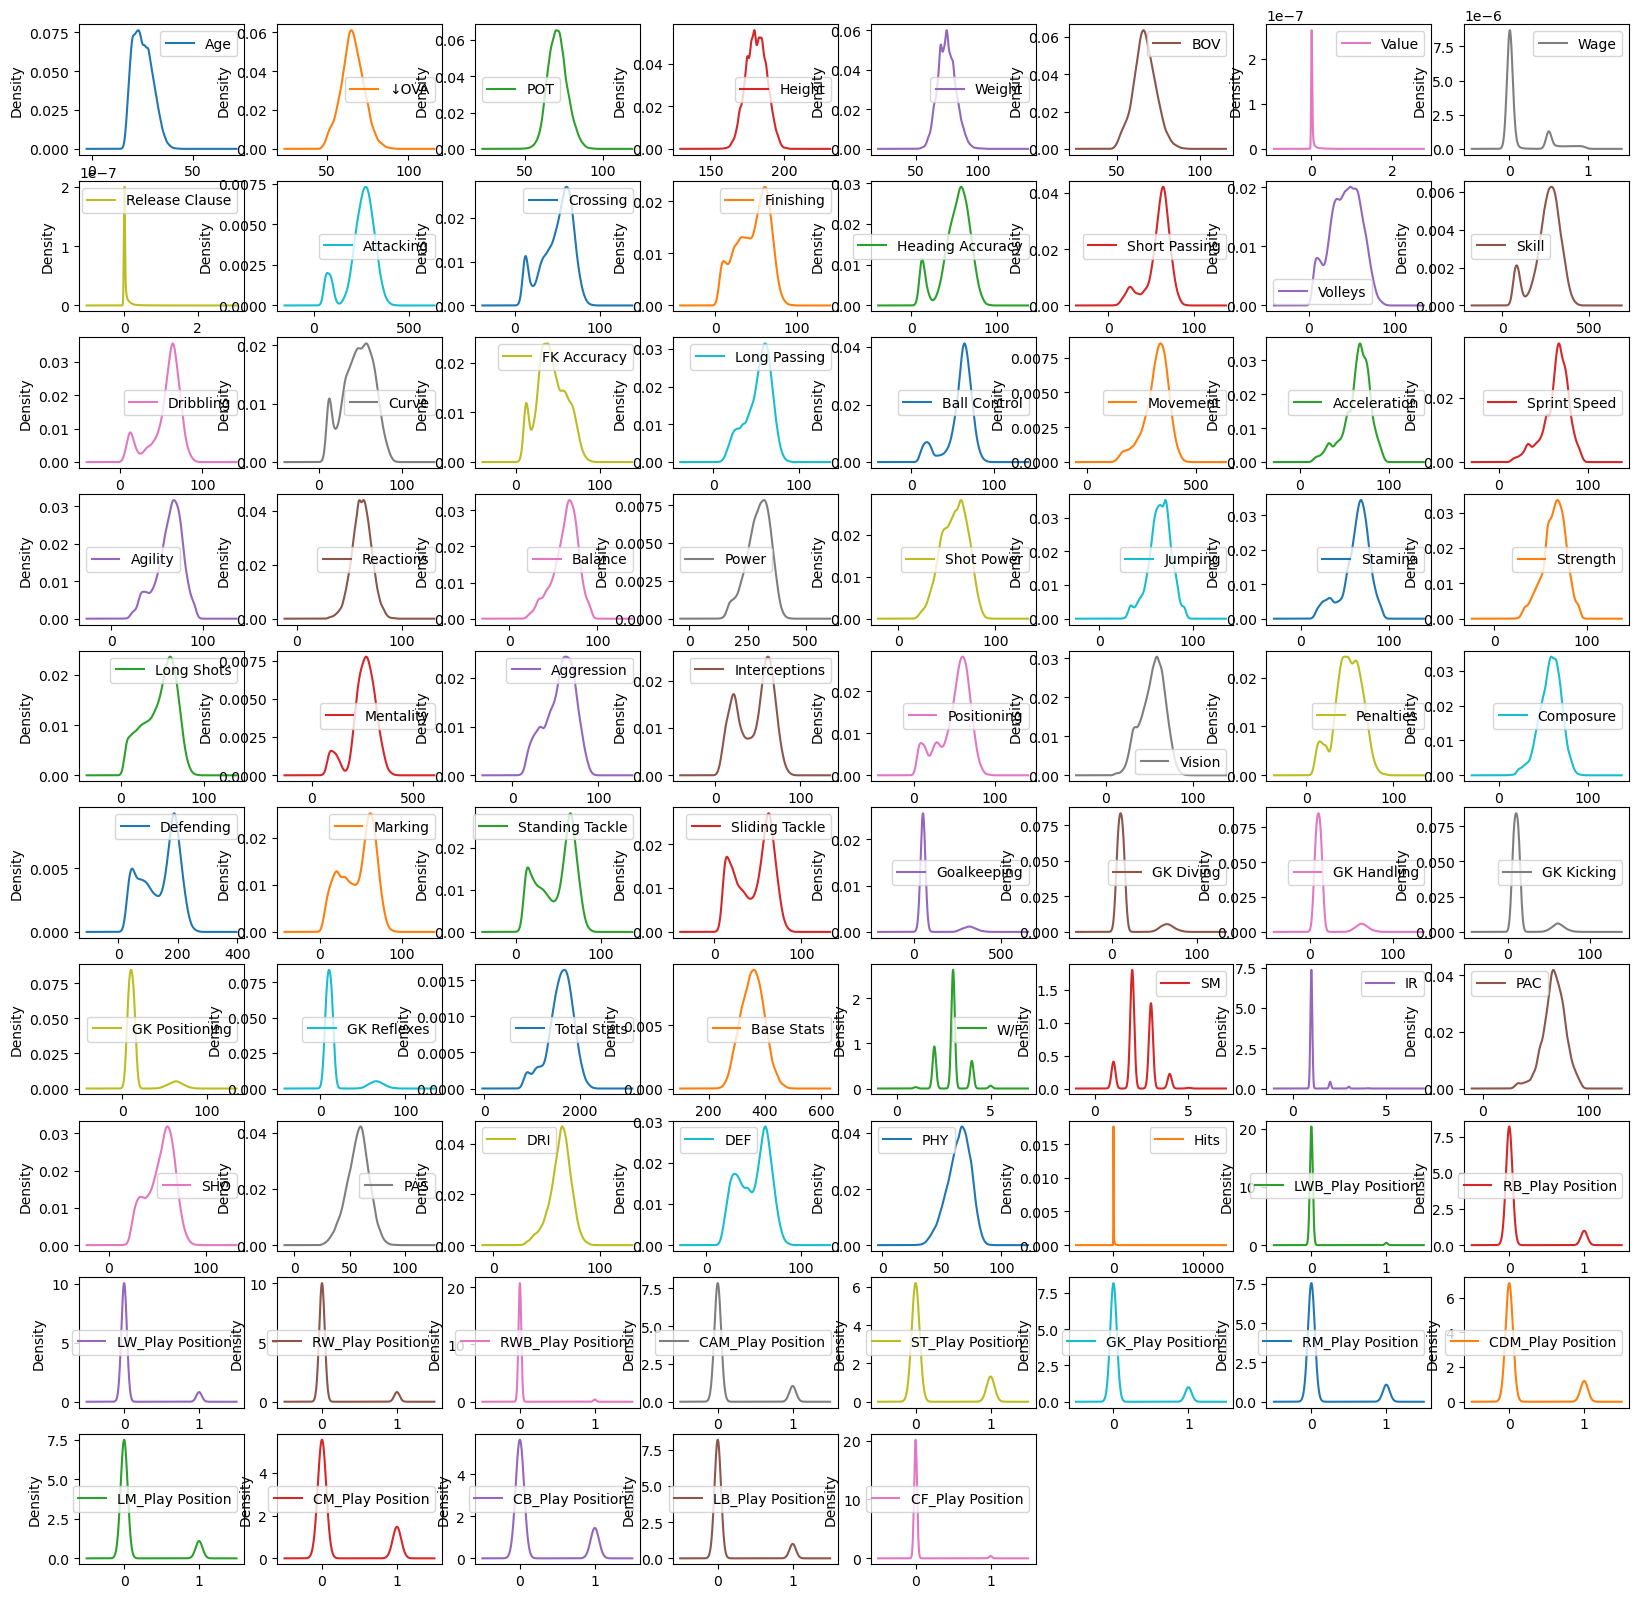

In [24]:
#Plotting the Density plots

from matplotlib import pyplot as plt
dfCopy.plot(kind = 'density', subplots = True, layout = (10, 8), sharex = False)
plt.gcf().set_size_inches(20,20)
plt.show() 

In [25]:
#Spliting the dataset based on data type
intVar = dfCopy.select_dtypes(include = 'int64') 
contVar = dfCopy.select_dtypes(include = 'float')
categVar = dfCopy.select_dtypes(include = 'object') 

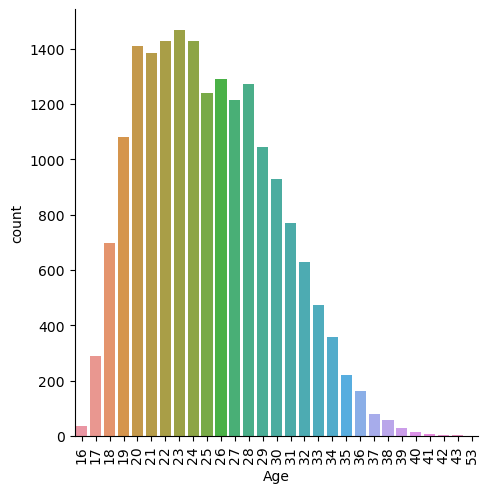

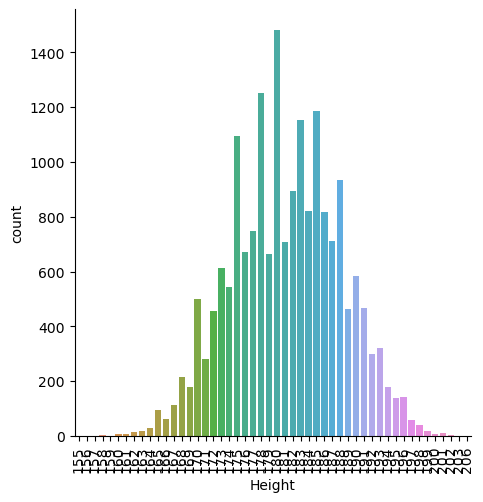

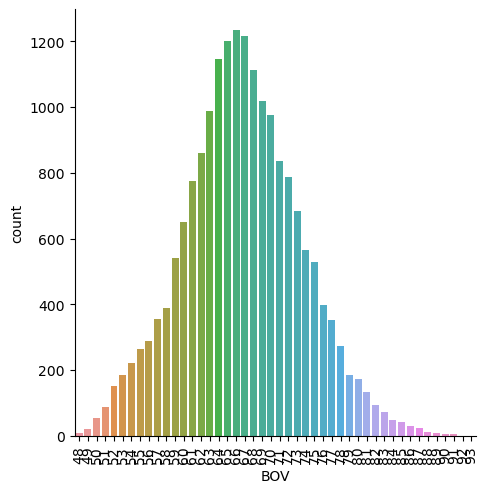

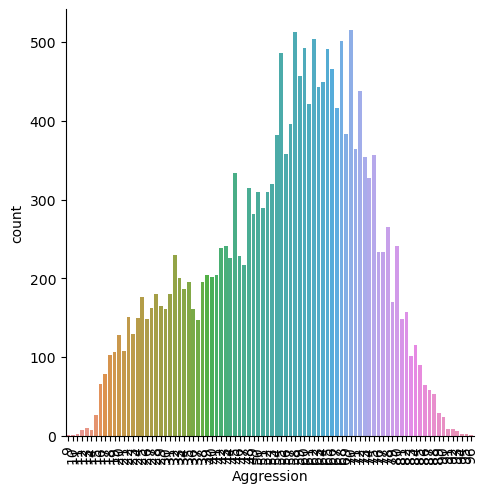

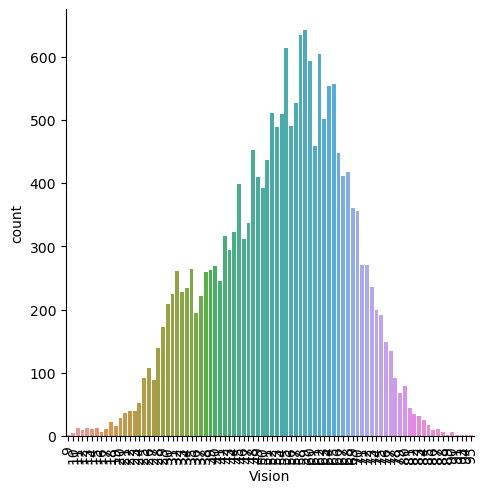

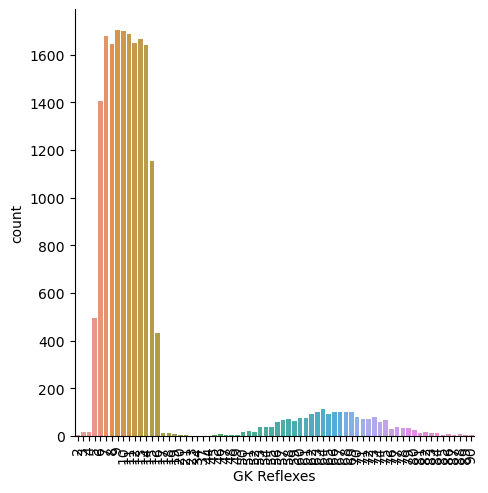

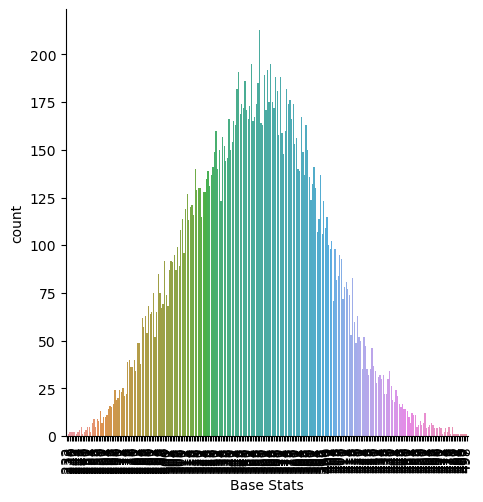

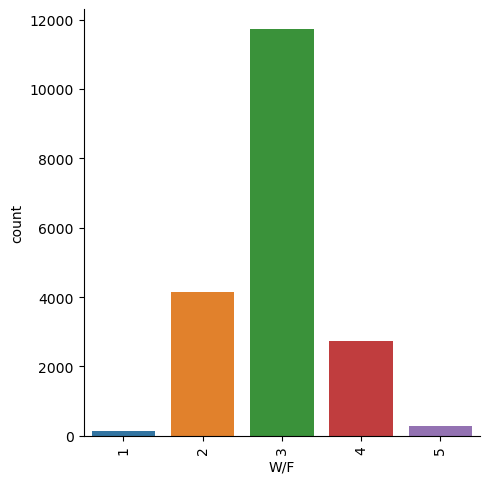

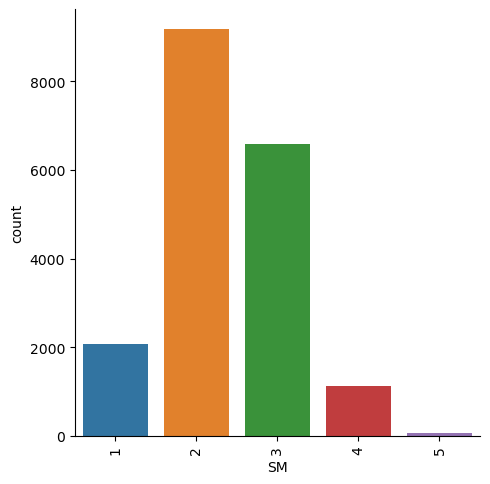

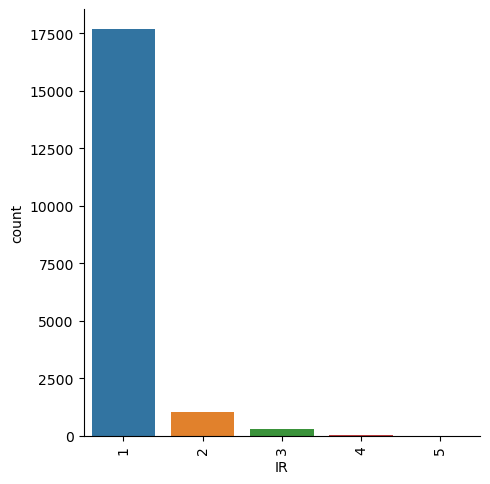

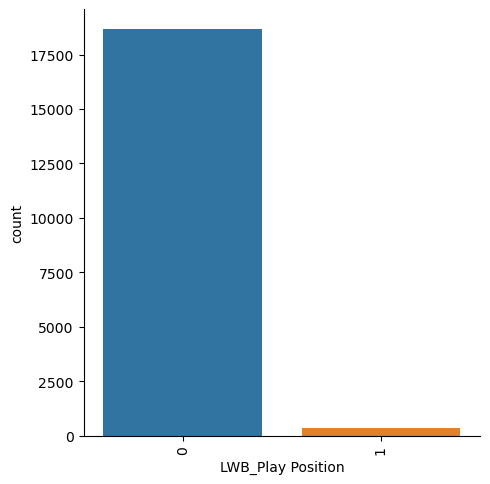

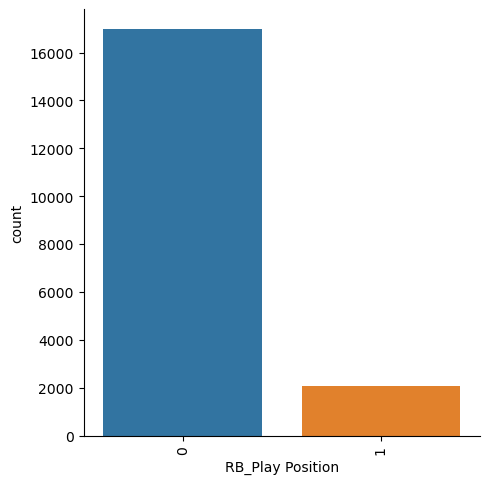

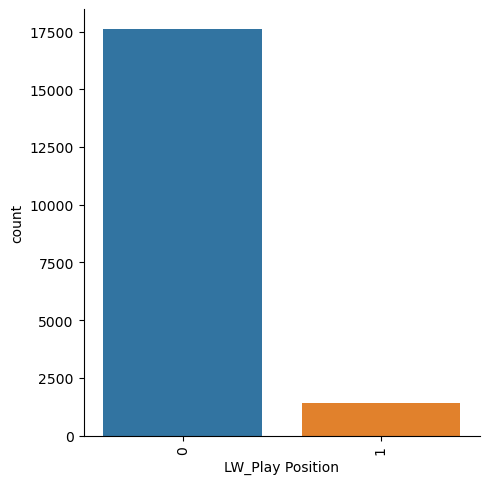

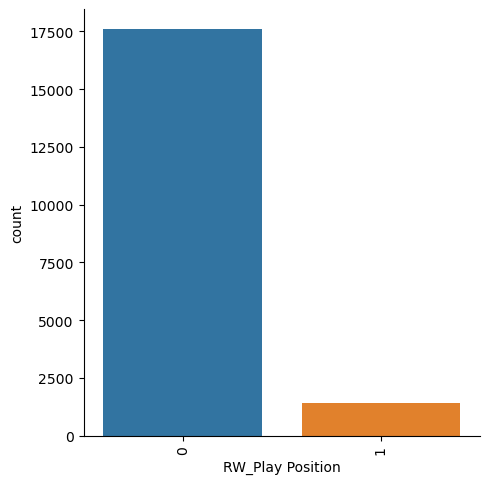

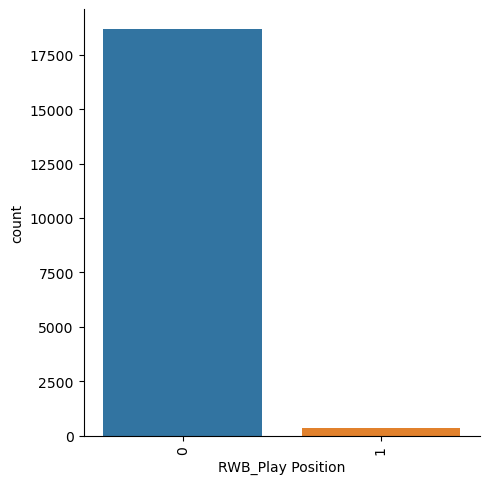

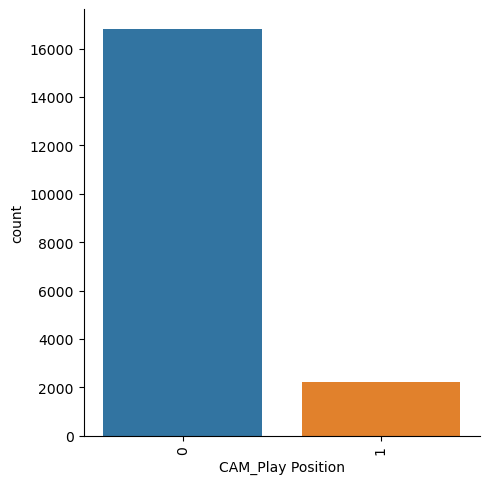

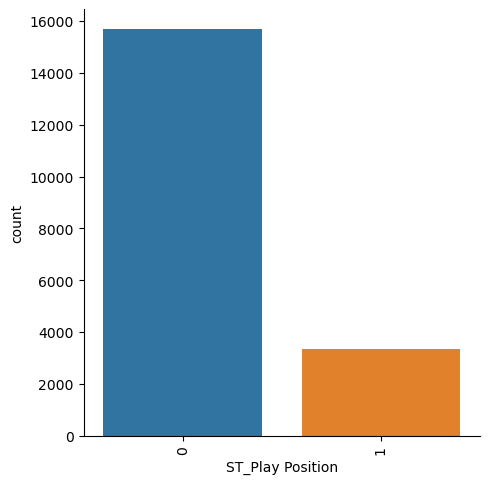

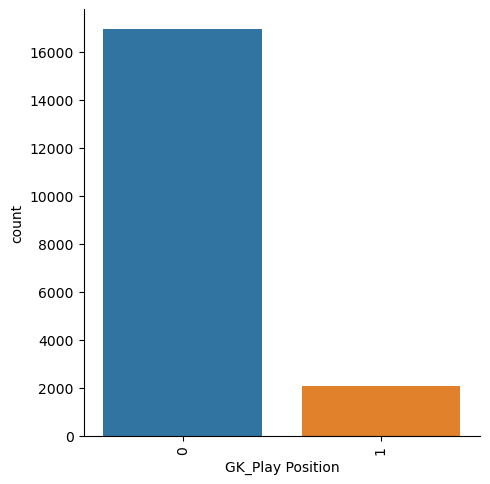

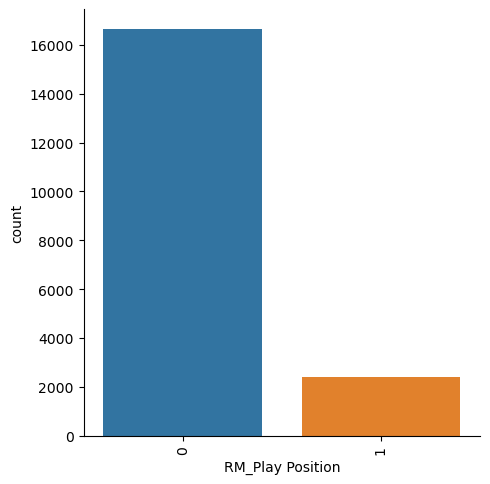

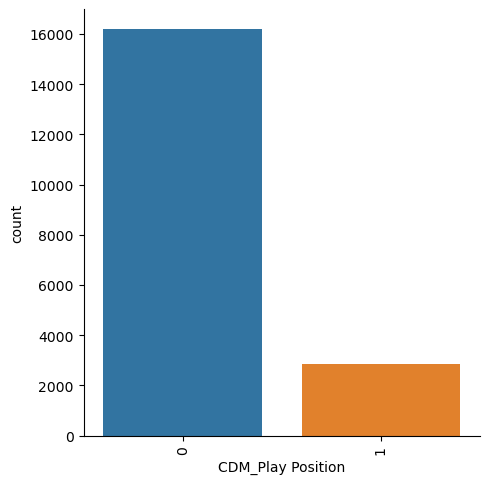

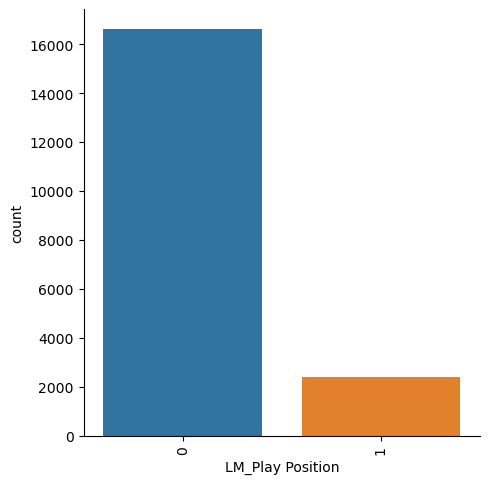

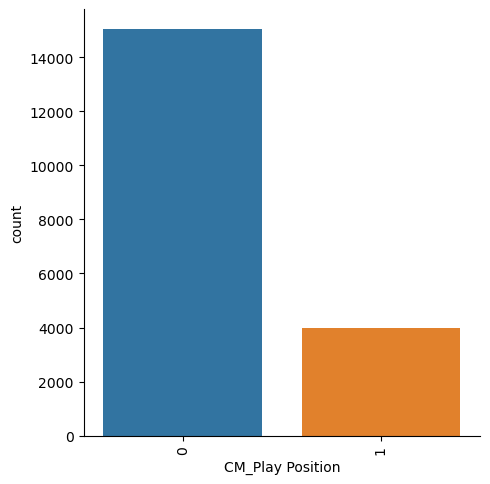

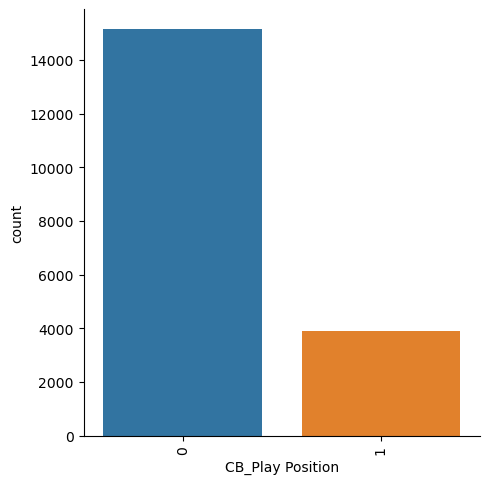

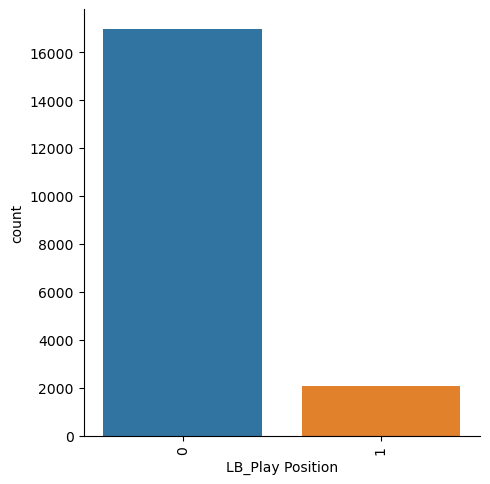

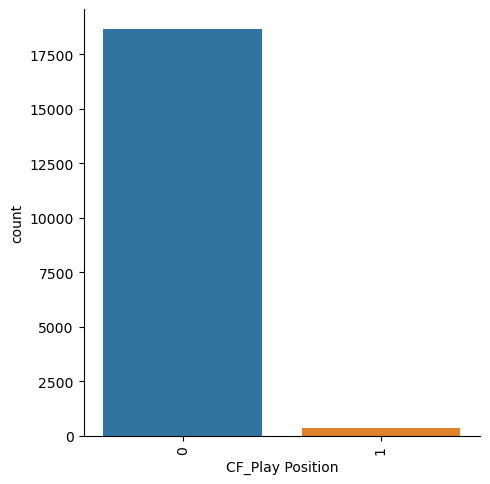

In [26]:
for col in intVar[1:]:
    g = sns.catplot(x=col,  kind='count', data=dfCopy, sharey=False)
    g.set_xticklabels(rotation=90) 

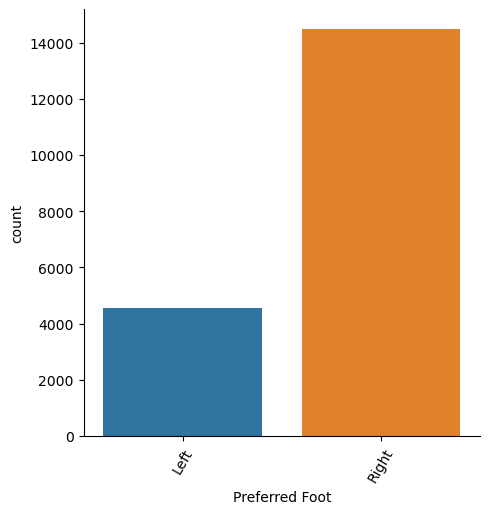

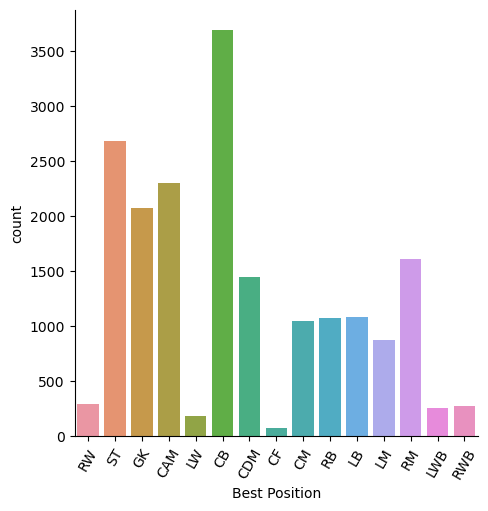

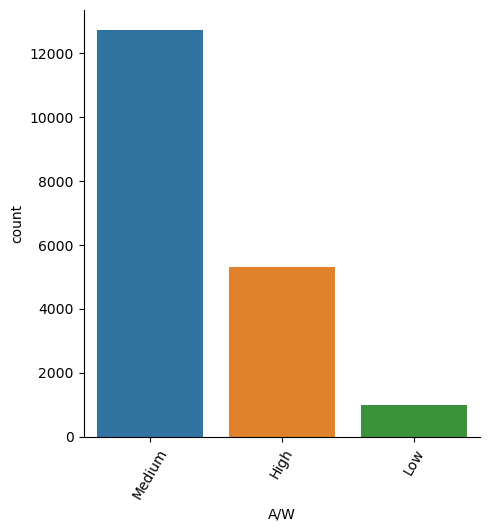

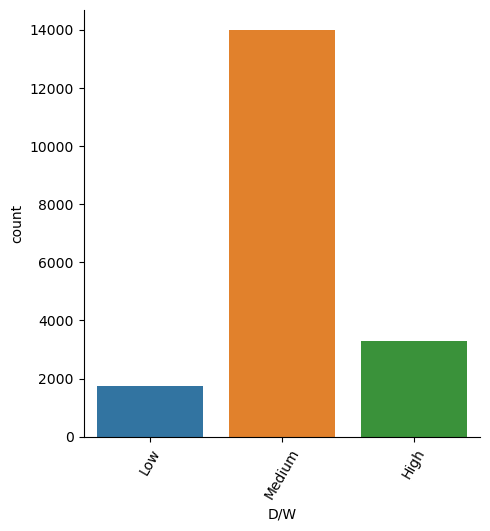

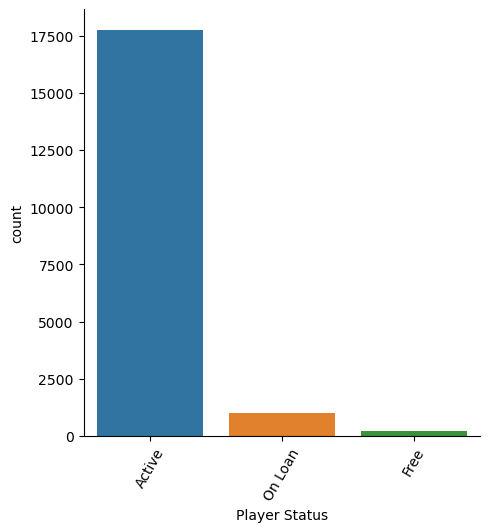

In [27]:
#Inspecting the distribution of the Categorical Data
for col in categVar[1:]:
    g = sns.catplot(x=col,  kind='count', data=dfCopy, sharey=False)
    g.set_xticklabels(rotation=60)

# Inspecting for Outliers

<Figure size 2000x2400 with 0 Axes>

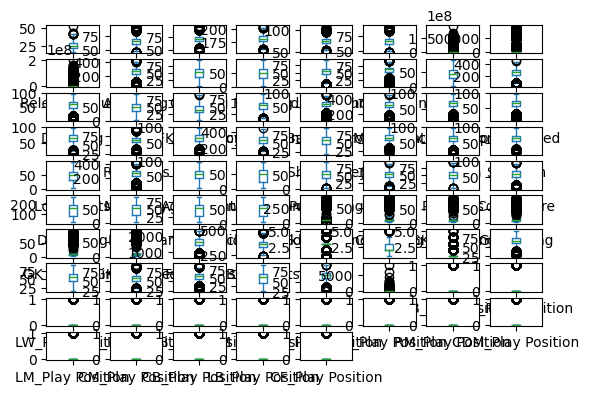

In [28]:
from matplotlib.pyplot import figure
figure(figsize=(25,30), dpi=80)
dfCopy.plot(kind='box', subplots = True, layout = (11,8), sharex = False, sharey = False) 
plt.rcParams["figure.figsize"] = (20, 25)
plt.show() 

# Inspecting for Duplicate

In [29]:
print(f'Duplicated Rows is: {dfCopy.duplicated().sum()}')  

Duplicated Rows is: 42


In [30]:
dfCopy.describe().T 

,count,mean,std,min,25%,50%,75%,max
Age,19021.0,25.191052,4.709833,16.0,21.0,25.0,29.0,53.0
↓OVA,19019.0,65.710027,6.961705,47.0,61.0,66.0,70.0,93.0
POT,19020.0,71.133176,6.114062,47.0,67.0,71.0,75.0,95.0
Height,19021.0,181.196940,6.838348,155.0,176.0,181.0,186.0,206.0
Weight,19020.0,75.015720,7.071909,50.0,70.0,75.0,80.0,110.0
...,...,...,...,...,...,...,...,...
LM_Play Position,19021.0,0.127123,0.333119,0.0,0.0,0.0,0.0,1.0
CM_Play Position,19021.0,0.209978,0.407304,0.0,0.0,0.0,0.0,1.0
CB_Play Position,19021.0,0.204248,0.403162,0.0,0.0,0.0,0.0,1.0
LB_Play Position,19021.0,0.108775,0.311364,0.0,0.0,0.0,0.0,1.0


In [31]:
dfCopy.isna().sum() 

Age                 0
↓OVA                2
POT                 1
Height              0
Weight              1
                   ..
LM_Play Position    0
CM_Play Position    0
CB_Play Position    0
LB_Play Position    0
CF_Play Position    0
Length: 82, dtype: int64

INFERENCE
1. Dataset contains in missing values
2. Dataset contains outliers
3. Dataset contains duplicated rows
4. There is data type mismatch is some features
5. There is a need to rescale the data
6. Dataset not normally distributed hence Needs Normalization and Standardization

# Dealing with Missing Value 

In filling for missing values the dataset was divided into five clusters according to the age group. The Age feature was 
used because of the percieved relationship between the player performance and age. After dividing into clusters, missing
values were filled using MEAN for features that are near normal distribution and MEDIAN for features that are not normally
distributed. PAD method was used for categorical feature.

In [32]:
#Extracting number of missing values per features
cols = dfCopy.columns
for col in cols: 
    if dfCopy[col].isna().sum() == 0:
        pass
    else:
        print(f'Column Name: {col} = {dfCopy[col].isna().sum()}') 

Column Name: ↓OVA = 2
Column Name: POT = 1
Column Name: Weight = 1
Column Name: Release Clause = 3
Column Name: Attacking = 1
Column Name: Crossing = 1
Column Name: Finishing = 5
Column Name: Heading Accuracy = 8
Column Name: Short Passing = 9
Column Name: Volleys = 7
Column Name: Skill = 6
Column Name: Dribbling = 1
Column Name: Curve = 8
Column Name: FK Accuracy = 6
Column Name: Long Passing = 3
Column Name: Ball Control = 3
Column Name: Movement = 5
Column Name: Acceleration = 4
Column Name: Sprint Speed = 3
Column Name: Agility = 2
Column Name: Reactions = 4
Column Name: Balance = 7
Column Name: Power = 1
Column Name: Shot Power = 2
Column Name: Jumping = 4
Column Name: Stamina = 1
Column Name: Strength = 5
Column Name: Long Shots = 7
Column Name: Mentality = 6
Column Name: Interceptions = 4
Column Name: Positioning = 1
Column Name: Penalties = 1
Column Name: Composure = 1
Column Name: Defending = 1
Column Name: Marking = 2
Column Name: Standing Tackle = 3
Column Name: Sliding Tack

# Dividing the Dataset into clusters based on the age of players to fill for missing value

In [33]:
dfCopy['Age_bin'] = pd.cut(x=dfCopy['Age'], bins=5, labels=['Below-24', '24-31', '31-39', '39-46','Above-46'])

#clustering the dataset by age into different variable
df1 = dfCopy.loc[dfCopy['Age_bin'] == 'Below-24']
df2 = dfCopy.loc[dfCopy['Age_bin'] == '24-31']
df3 = dfCopy.loc[dfCopy['Age_bin'] == '31-39']
df4 = dfCopy.loc[dfCopy['Age_bin'] == '39-46']
df5 = dfCopy.loc[dfCopy['Age_bin'] == 'Above-46'] 

# Filling for Missing Value in each clusters

In [34]:
#Columns with Missing Value
colMiss = ['↓OVA', 'POT', 'Weight', 'Release Clause', 
           'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy', 
           'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve', 'FK Accuracy', 
           'Long Passing', 'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed', 
           'Agility', 'Reactions', 'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 
           'Strength', 'Long Shots', 'Mentality', 'Interceptions', 'Positioning', 'Penalties',
           'Composure', 'Defending', 'Marking', 'Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 
           'GK Diving', 'GK Handling', 'GK Kicking',
           'GK Positioning', 'Total Stats', 'D/W', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY']

In [35]:
#cluster 1:
def fill_miss(feat):
    if feat in ['POT','Crossing','Skill','Interception','Penalties','Sliding Tackles']:
        df1[feat].fillna(df1[feat].mean(), inplace=True)
    elif feat in ['Release Clause','D/W']:
        df1[feat].fillna(method = 'pad', inplace=True)
    else:
        df1[feat].fillna(df1[feat].mean(), inplace=True)

for col in colMiss:
    fill_miss(col)

In [36]:
#cluster 2:
def fill_miss(feat):
    if feat in ['POT','Crossing','Skill','Interception','Penalties','Sliding Tackles']:
        df2[feat].fillna(df2[feat].mean(), inplace=True)
    elif feat in ['Release Clause','D/W']:
        df2[feat].fillna(method = 'pad', inplace=True)
    else:
        df2[feat].fillna(df2[feat].mean(), inplace=True)

for col in colMiss:
    fill_miss(col)

In [37]:
#cluster 3:
def fill_miss(feat):
    if feat in ['POT','Crossing','Skill','Interception','Penalties','Sliding Tackles']:
        df3[feat].fillna(df3[feat].mean(), inplace=True)
    elif feat in ['Release Clause','D/W']:
        df3[feat].fillna(method = 'pad', inplace=True)
    else:
        df3[feat].fillna(df3[feat].mean(), inplace=True)

for col in colMiss:
    fill_miss(col)

In [38]:
#Merging the dataframes as one
cleanDf = pd.concat([df3,df2,df1,df5,df4])

In [39]:
#Data Mismatch: converting data type from float to int64
floatToInt = ['Weight','Dribbling','Short Passing']
for item in floatToInt:
    cleanDf[item] = cleanDf[item].astype('int64') 

In [51]:
#sub_task 7: Binning of selected features

#function to determine upperband
def upperbandFunc(feat,interval, val, count):
    Upperbands = []
    interval = int(interval)
    count = count
    while count <= (max(cleanDf[feat])/interval + val): 
        Upperbands.append(interval*count) 
        count+=1
    return Upperbands

#function to Binned each columns
def  binFunc(feat, bands):
    cleanDf[feat+'_'+'Binned'] = pd.cut(x=cleanDf[feat], bins=bands, right = False) 

#Calling the function to binned the Selected columns
catCols = ['Height','Weight','Wage', 'Value', 'Release Clause']
intCols = ['10', '10', '50000', '50000000', '50000000']
for cate, intval, in zip(catCols, intCols):
    if cate == catCols[0]:
        val = 1
        n_count = 1
        bound = upperbandFunc(cate,intval, val, n_count) 
        binFunc(cate, bound)
    elif cate == catCols[1]:
        val = 0
        n_count = 1
        bound = upperbandFunc(cate,intval, val, n_count) 
        binFunc(cate, bound)
    elif cate == catCols[2]:
        val = 0
        n_count = 0
        bound = upperbandFunc(cate,intval, val, n_count) 
        binFunc(cate, bound)
    elif cate == catCols[3]:
        val = 1
        n_count = 0
        bound = upperbandFunc(cate,intval, val, n_count) 
        binFunc(cate, bound)
    else:
        val = 1
        n_count = 0
        bound = upperbandFunc(cate,intval, val, n_count) 
        binFunc(cate, bound)   

In [61]:
cleanDf['Wage_Binned']

0        [550000, 600000)
1        [200000, 250000)
5        [200000, 250000)
14       [100000, 150000)
15       [350000, 400000)
               ...       
15854          [0, 50000)
16038    [550000, 600000)
16221          [0, 50000)
16663          [0, 50000)
17115    [600000, 650000)
Name: Wage_Binned, Length: 18979, dtype: category
Categories (19, interval[int64, left]): [[0, 50000) < [50000, 100000) < [100000, 150000) < [150000, 200000) ... [750000, 800000) < [800000, 850000) < [850000, 900000) < [900000, 950000)]

In [62]:
len(cleanDf) 

18979

In [63]:
cleanDf.head(5) 

,Age,↓OVA,POT,Height,Weight,Preferred Foot,BOV,Best Position,Value,Wage,...,CM_Play Position,CB_Play Position,LB_Play Position,CF_Play Position,Age_bin,Height_Binned,Weight_Binned,Wage_Binned,Value_Binned,Release Clause_Binned
0,33,93.0,93.0,170,72,Left,93,RW,103500000.0,560000.0,...,0,0,0,1,31-39,"[170, 180)","[70, 80)","[550000, 600000)","[100000000, 150000000)","[100000000, 150000000)"
1,35,92.0,92.0,187,83,Right,92,ST,63000000.0,220000.0,...,0,0,0,0,31-39,"[180, 190)","[80, 90)","[200000, 250000)","[50000000, 100000000)","[50000000, 100000000)"
5,31,91.0,91.0,184,80,Right,91,ST,111000000.0,240000.0,...,0,0,0,0,31-39,"[180, 190)","[80, 90)","[200000, 250000)","[100000000, 150000000)","[100000000, 150000000)"
14,34,89.0,89.0,193,92,Right,89,GK,17500000.0,130000.0,...,0,0,0,0,31-39,"[190, 200)","[90, 100)","[100000, 150000)","[0, 50000000)","[0, 50000000)"
15,32,89.0,89.0,185,81,Right,89,CF,83500000.0,350000.0,...,0,0,0,1,31-39,"[180, 190)","[80, 90)","[350000, 400000)","[50000000, 100000000)","[100000000, 150000000)"


# Dropping Duplicate rows

In [42]:
cleanDf.drop_duplicates(inplace=True) 

# Extracting only the Hits Records with NaN Value

Since Hits feature which is the outcome has missing values is it pertinent to extract all missing values into a separate 
datafram and work with the dataset without missing values in building the model

In [43]:
#Nan Values with the Outcome Variable 
dfNan = cleanDf.loc[cleanDf.isnull().any (axis = 1)]  
dfNan 

,Age,↓OVA,POT,Height,Weight,Preferred Foot,BOV,Best Position,Value,Wage,...,CM_Play Position,CB_Play Position,LB_Play Position,CF_Play Position,Age_bin,Height_Binned,Weight_Binned,Wage_Binned,Value_Binned,Release Clause_Binned
16392,36,58.0,58.0,174,74,Left,58,LM,70000.0,2000.0,...,0,0,1,0,31-39,"(170.0, 180.0]","(70.0, 80.0]","(-0.001, 50000.0]","(-0.001, 50000000.0]","(-0.001, 50000000.0]"
16441,31,58.0,58.0,175,73,Right,60,CDM,170000.0,550000.0,...,1,0,0,0,31-39,"(170.0, 180.0]","(70.0, 80.0]","(500000.0, 550000.0]","(-0.001, 50000000.0]","(-0.001, 50000000.0]"
16466,31,58.0,58.0,183,68,Right,58,GK,110000.0,2000.0,...,0,0,0,0,31-39,"(180.0, 190.0]","(60.0, 70.0]","(-0.001, 50000.0]","(-0.001, 50000000.0]","(-0.001, 50000000.0]"
16504,35,58.0,58.0,186,77,Right,60,CDM,80000.0,2000.0,...,0,1,0,0,31-39,"(180.0, 190.0]","(70.0, 80.0]","(-0.001, 50000.0]","(-0.001, 50000000.0]","(-0.001, 50000000.0]"
16561,34,58.0,58.0,181,76,Right,58,CM,90000.0,1000.0,...,1,0,0,0,31-39,"(180.0, 190.0]","(70.0, 80.0]","(-0.001, 50000.0]","(-0.001, 50000000.0]","(-0.001, 50000000.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19018,18,47.0,65.0,179,74,Right,49,CAM,120000.0,500000.0,...,1,0,0,0,Below-24,"(170.0, 180.0]","(70.0, 80.0]","(450000.0, 500000.0]","(-0.001, 50000000.0]","(-0.001, 50000000.0]"
19019,20,47.0,57.0,175,69,Right,48,ST,100000.0,2000.0,...,0,0,0,0,Below-24,"(170.0, 180.0]","(60.0, 70.0]","(-0.001, 50000.0]","(-0.001, 50000000.0]","(-0.001, 50000000.0]"
19020,21,47.0,57.0,188,75,Left,50,LB,100000.0,1000.0,...,0,1,1,0,Below-24,"(180.0, 190.0]","(70.0, 80.0]","(-0.001, 50000.0]","(-0.001, 50000000.0]","(-0.001, 50000000.0]"
16663,41,58.0,58.0,180,76,Left,61,ST,0.0,2000.0,...,0,0,0,0,39-46,"(170.0, 180.0]","(70.0, 80.0]","(-0.001, 50000.0]","(-0.001, 50000000.0]","(-0.001, 50000000.0]"


# Dataset without NaN value

In [64]:
#Clean dataset without NaN value
dfClean = cleanDf.dropna() 

In [65]:
dfClean.shape 

(16210, 88)

In [66]:
cleanDf.shape 

(18979, 88)

In [67]:
dfClean.shape

(16210, 88)

In [68]:
len(cleanDf) - len(dfClean) 

2769

# Detecting Percentage of Outliers 

In [46]:
numerical_Vars = dfClean.select_dtypes(include='number')

In [47]:
cols = numerical_Vars.columns  
def outliers_con(col):
    q3, q1 = np.percentile(col, [75, 25])
    iqr = q3 - q1
    upperLimit = q3 + 1.5*iqr
    lowerLimit = q1 - 1.5*iqr
    return upperLimit, lowerLimit

#Detecting Outliers
for col in cols:
    print(f'Column : {col}')
    upper, lower = outliers_con(dfClean[col]) 
    print(f'Upper Limit = {upper}')
    print(f'Lower Limit = {lower}')
    
    total_outliers = len(dfClean.loc[dfClean[col]< lower, col]) + len(dfClean.loc[dfClean[col] > upper, col])
    percent = (total_outliers/len(dfClean.index))*100
    print(f'Percentage of Outliers = {percent}')
    print('-'*40)

Column : Age
Upper Limit = 39.5
Lower Limit = 11.5
Percentage of Outliers = 0.15306434825200513
----------------------------------------
Column : ↓OVA
Upper Limit = 83.0
Lower Limit = 51.0
Percentage of Outliers = 0.8694054980713892
----------------------------------------
Column : POT
Upper Limit = 88.0
Lower Limit = 56.0
Percentage of Outliers = 0.37959958366497276
----------------------------------------
Column : Height
Upper Limit = 201.0
Lower Limit = 161.0
Percentage of Outliers = 0.11020633074144372
----------------------------------------
Column : Weight
Upper Limit = 95.0
Lower Limit = 55.0
Percentage of Outliers = 0.3979673054552134
----------------------------------------
Column : BOV
Upper Limit = 84.0
Lower Limit = 52.0
Percentage of Outliers = 0.7836894630502663
----------------------------------------
Column : Value
Upper Limit = 4812500.0
Lower Limit = -1887500.0
Percentage of Outliers = 12.84516010530827
----------------------------------------
Column : Wage
Upper Limi

In [48]:
dfClean.select_dtypes(include='float').skew()   

↓OVA                 0.666875
POT                  0.324979
Value                7.482914
Wage                 2.413924
Release Clause       6.452722
Attacking           -1.248124
Crossing            -0.786275
Finishing           -0.417639
Heading Accuracy    -0.990620
Volleys             -0.244709
Skill               -0.961855
Curve               -0.386116
FK Accuracy          0.019050
Long Passing        -0.746334
Ball Control        -1.580372
Movement            -0.761033
Acceleration        -0.810073
Sprint Speed        -0.825320
Agility             -0.678022
Reactions            0.143843
Balance             -0.616623
Power               -0.583083
Shot Power          -0.352903
Jumping             -0.466889
Stamina             -1.032429
Strength            -0.499953
Long Shots          -0.564566
Mentality           -1.109241
Interceptions       -0.386000
Positioning         -0.883052
Penalties           -0.379694
Composure           -0.588597
Defending           -0.399951
Marking   


# Using log transformation to reduce the Effect of Outliers on some selected Features

In [49]:
varSkew = ['Value','Wage', 'Release Clause','Goalkeeping','GK Diving', 'GK Handling','GK Kicking','GK Positioning',
          'Attacking','Short Passing', 'Skill','Dribbling','W/F','Heading Accuracy']
for var in varSkew:
    dfClean[var] = np.log1p(dfClean[var]) 

In [50]:
cols = numerical_Vars.columns  
def outliers_con(col):
    q3, q1 = np.percentile(col, [75, 25])
    iqr = q3 - q1
    upperLimit = q3 + 1.5*iqr
    lowerLimit = q1 - 1.5*iqr
    return upperLimit, lowerLimit

#Detecting Outliers
for col in cols:
    print(f'Column : {col}')
    upper, lower = outliers_con(dfClean[col]) 
    print(f'Upper Limit = {upper}')
    print(f'Lower Limit = {lower}')
    
    total_outliers = len(dfClean.loc[dfClean[col]< lower, col]) + len(dfClean.loc[dfClean[col] > upper, col])
    percent = (total_outliers/len(dfClean.index))*100
    print(f'Percentage of Outliers = {percent}')
    print('-'*40)

Column : Age
Upper Limit = 39.5
Lower Limit = 11.5
Percentage of Outliers = 0.15306434825200513
----------------------------------------
Column : ↓OVA
Upper Limit = 83.0
Lower Limit = 51.0
Percentage of Outliers = 0.8694054980713892
----------------------------------------
Column : POT
Upper Limit = 88.0
Lower Limit = 56.0
Percentage of Outliers = 0.37959958366497276
----------------------------------------
Column : Height
Upper Limit = 201.0
Lower Limit = 161.0
Percentage of Outliers = 0.11020633074144372
----------------------------------------
Column : Weight
Upper Limit = 95.0
Lower Limit = 55.0
Percentage of Outliers = 0.3979673054552134
----------------------------------------
Column : BOV
Upper Limit = 84.0
Lower Limit = 52.0
Percentage of Outliers = 0.7836894630502663
----------------------------------------
Column : Value
Upper Limit = 16.60278749612884
Lower Limit = 11.391141148270309
Percentage of Outliers = 6.085838486499724
----------------------------------------
Column :

JUSTIFICATION

The presence of outliers in the data might be ascribe to imbalance in the data distribution. This Outliers in the dataset were not dropped because there are unique data of players which are useful in predicting their number of hits, and chance are that this data might varies accross players as a result if the outliers in the dataset are dropped the model might not be accurate in its prediction. Instead of dropping the outliers, the features with higher percentage of outliers were skew to reduce the effect of outliers. Also rescaling, standardization and normalization can help cushion the effect of the outliers.

# Part 2: Data Transformation

# Feature Preprocessing and Data Transformation

In [50]:
#Encoding the categorical variables in the dataset
categ_var = dfCopy.select_dtypes(include = 'object') 
for col in categ_var.columns:
    encoder = LabelEncoder()
    dfClean[col] = encoder.fit_transform(dfClean[col]) 

colList =['Age_bin','Height_Binned','Weight_Binned','Wage_Binned', 'Value_Binned', 'Release Clause_Binned'] 
for col in colList:
    dfClean[col] = encoder.fit_transform(dfClean[col])

In [51]:
#Rearrange the columns (Making the Hits Column the Last)
newDf = dfClean['Hits'] 
dfClean = dfClean.drop(['Hits'], axis=1)

dfClean['Hits'] = newDf  

In [52]:
dfClean.describe().T 

,count,mean,std,min,25%,50%,75%,max
Age,16333.0,25.928121,4.499923,16.0,22.0,26.0,29.0,53.0
↓OVA,16333.0,67.514111,5.661923,58.0,63.0,67.0,71.0,93.0
POT,16333.0,71.872653,5.890455,58.0,68.0,72.0,76.0,95.0
Height,16333.0,181.283475,6.845812,155.0,176.0,181.0,186.0,206.0
Weight,16333.0,75.372497,7.058881,50.0,70.0,75.0,80.0,110.0
...,...,...,...,...,...,...,...,...
Weight_Binned,16333.0,2.958673,0.767446,0.0,2.0,3.0,3.0,6.0
Wage_Binned,16333.0,1.485643,3.778669,0.0,0.0,0.0,0.0,17.0
Value_Binned,16333.0,0.007592,0.100531,0.0,0.0,0.0,0.0,3.0
Release Clause_Binned,16333.0,0.012061,0.131082,0.0,0.0,0.0,0.0,4.0


# Rescaling 

In [53]:
cols = ['Age', '↓OVA', 'POT', 'Height', 'Weight', 'Preferred Foot', 'BOV',
       'Best Position', 'Value', 'Wage', 'Release Clause', 'Attacking',
       'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Skill', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing',
       'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed', 'Agility',
       'Reactions', 'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina',
       'Strength', 'Long Shots', 'Mentality', 'Aggression', 'Interceptions',
       'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending',
       'Marking', 'Standing Tackle', 'Sliding Tackle', 'Goalkeeping',
       'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning',
       'GK Reflexes', 'Total Stats', 'Base Stats', 'W/F', 'SM', 'A/W', 'D/W',
       'IR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Player Status',
       'LB_Play Position', 'ST_Play Position', 'CAM_Play Position',
       'RM_Play Position', 'RWB_Play Position', 'LWB_Play Position',
       'CB_Play Position', 'LM_Play Position', 'GK_Play Position',
       'RB_Play Position', 'CF_Play Position', 'RW_Play Position',
       'LW_Play Position', 'CDM_Play Position', 'CM_Play Position', 'Age_bin',
       'Height_Binned', 'Weight_Binned', 'Wage_Binned', 'Value_Binned',
       'Release Clause_Binned',]

In [54]:
#Extracting the value for data Preprocessing and Transformation
data = dfClean.values 
X = data[:,0:87]
Y = data[:, 87]

scaler = MinMaxScaler(feature_range=(0,1))
resData = scaler.fit_transform(X)
set_printoptions(precision=3)

#Setting the data back to DataFrame
resDf = pd.DataFrame(resData, columns=cols) 
resDf['Hits'] = list(Y)

# Standardization

In [55]:
data = resDf.values
X = data[:,0:87]
Y = data[:, 87]

scaler = StandardScaler().fit(X)
resData = scaler.transform(X)
set_printoptions(precision=3)

#Setting to DataFrame
resDf = pd.DataFrame(resData, columns=cols) 
resDf['Hits'] = list(Y)

# Normalization

In [56]:
data = resDf.values
X = data[:,0:87]
Y = data[:, 87]

scaler = Normalizer().fit(X)
resData = scaler.transform(X)
set_printoptions(precision=3)

#Setting to DataFrame
resDf = pd.DataFrame(resData, columns=cols) 
resDf['Hits'] = list(Y)

In [57]:
resDf.describe().T 

,count,mean,std,min,25%,50%,75%,max
Age,16333.0,-0.004280,0.120116,-0.321414,-0.093233,0.001364,0.078779,0.425430
↓OVA,16333.0,-0.009375,0.109084,-0.321620,-0.092202,-0.013822,0.072718,0.288152
POT,16333.0,-0.007277,0.116880,-0.406864,-0.088407,0.001597,0.074874,0.353034
Height,16333.0,-0.005921,0.114791,-0.388637,-0.089078,-0.004545,0.079338,0.386600
Weight,16333.0,-0.006526,0.113543,-0.387363,-0.088548,-0.006772,0.073833,0.471650
...,...,...,...,...,...,...,...,...
Weight_Binned,16333.0,-0.005915,0.114822,-0.415470,-0.111342,0.006870,0.009330,0.428159
Wage_Binned,16333.0,-0.003403,0.117658,-0.088090,-0.055882,-0.046648,-0.029691,0.601773
Value_Binned,16333.0,-0.005715,0.044691,-0.016920,-0.010865,-0.009383,-0.007757,0.700740
Release Clause_Binned,16333.0,-0.006483,0.049122,-0.020616,-0.013239,-0.011433,-0.009452,0.706087


# Feature Selection

Plotting the Heatmap Correlation Graph

<AxesSubplot:>

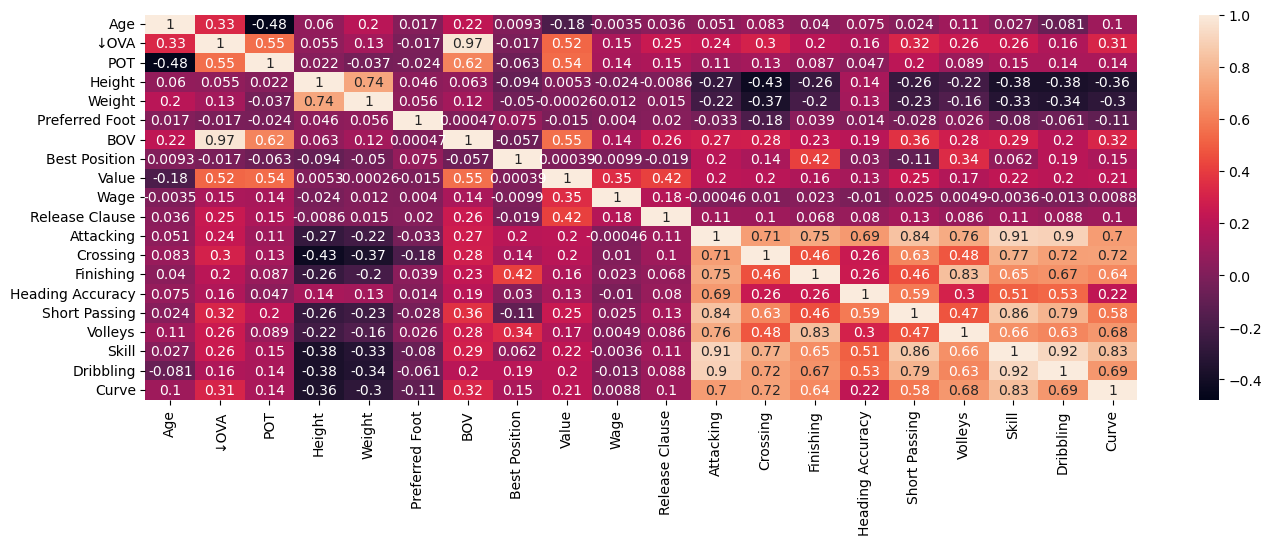

In [58]:
#First Clusters of the Data
feat = resDf.iloc[:,:20]
plt.figure(figsize=(16, 5))
sns.heatmap(feat.corr(), annot=True) 

<AxesSubplot:>

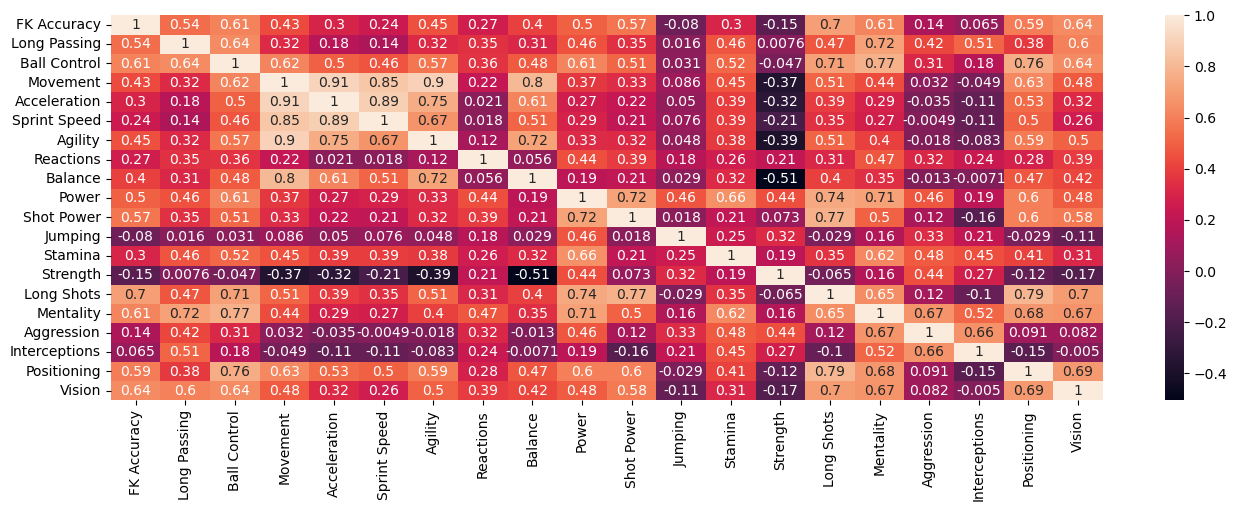

In [59]:
#Second Clusters

feat2 = resDf.iloc[:,20:40]
plt.figure(figsize=(16, 5))
sns.heatmap(feat2.corr(), annot=True) 

<AxesSubplot:>

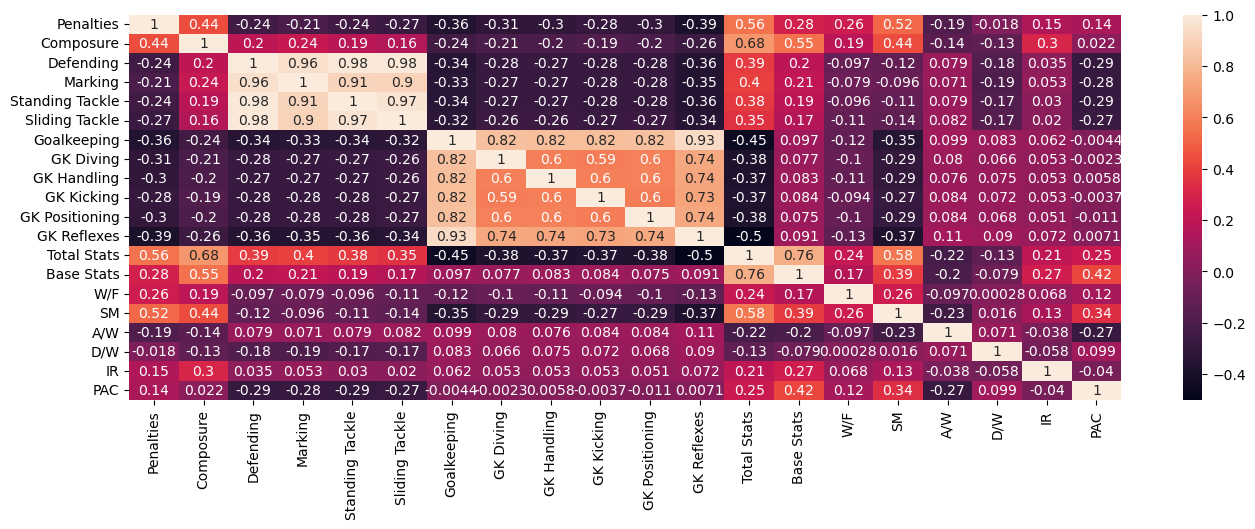

In [60]:
#Clusters 3

feat3 = resDf.iloc[:,40:60]  
plt.figure(figsize=(16, 5))
sns.heatmap(feat3.corr(), annot=True) 

<AxesSubplot:>

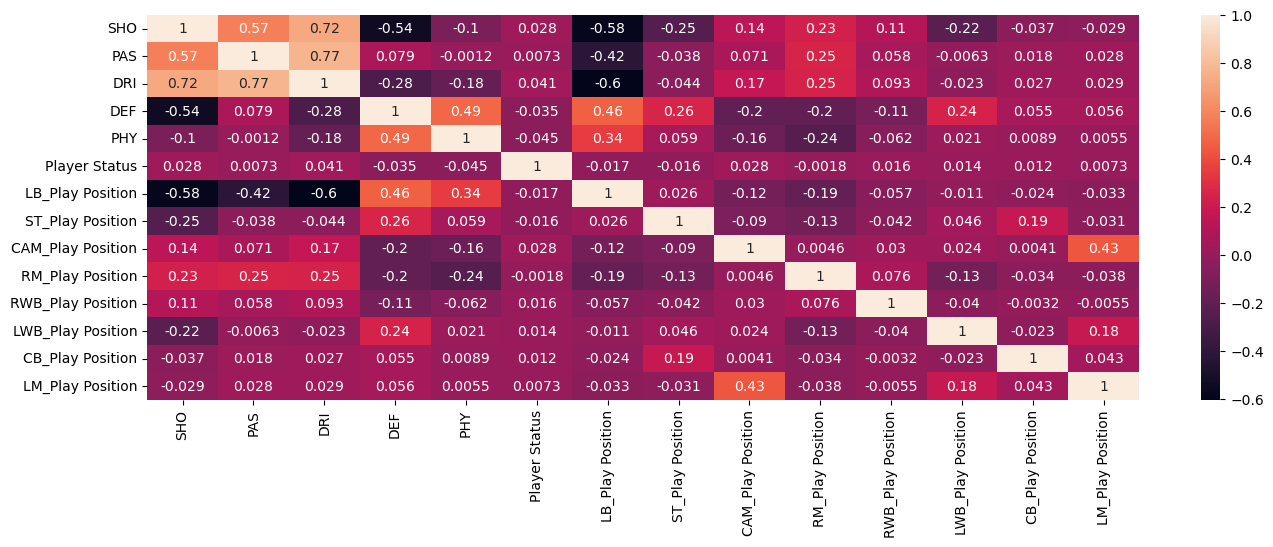

In [61]:
#Cluster 4:

feat4 = resDf.iloc[:,60:74]   
plt.figure(figsize=(16, 5))   
sns.heatmap(feat4.corr(), annot=True)  

<AxesSubplot:>

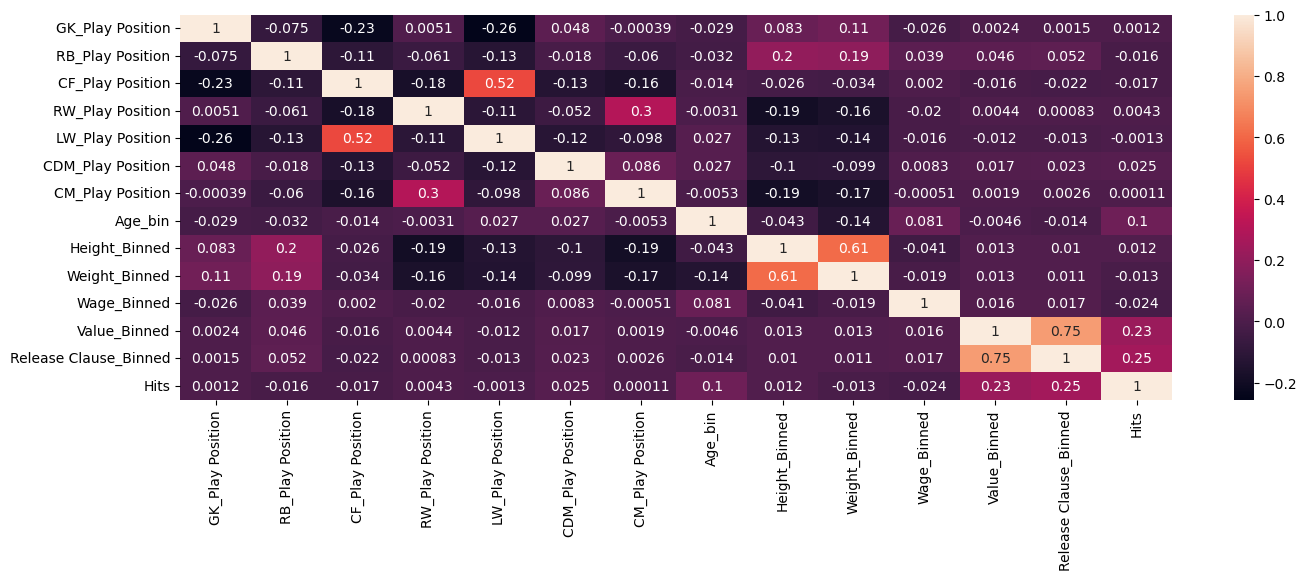

In [62]:
#Cluster 5:

feat5 = resDf.iloc[:,74:]  
plt.figure(figsize=(16, 5))   
sns.heatmap(feat5.corr(), annot=True)  

# Drop Columns with Multi-colinearity Effect

In [63]:
#Dropping columns where multi-colinearity exist
resDf.drop(['↓OVA','Dribbling','Short Passing', 'Skill','Volleys',
            'Acceleration', 'Sprint Speed', 'Agility','Balance','Marking', 'Standing Tackle', 'Sliding Tackle',
           'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning','GK Reflexes'], axis= 1, inplace= True) 

# Feature Selection with RFE 

In [64]:
resDf.shape

(16333, 71)

# Feature Selection Using RFE Model

In [65]:
def autoFeaureModeler(data, numFea, testSize):
    
    def feaSelector(X, y, numFea):
        
        model = RandomForestRegressor()
        rfe = RFE(model, n_features_to_select= numFea)
        fit = rfe.fit(X,y)
        
        return list(fit.ranking_)
    
    def featureSelector(data, rankList):
        cols = data.columns
        cols = list(cols)[0:(len(cols)-1)]
        
        selCols = []

        for col, rank  in zip(cols,rankList):
            if rank ==1:
                selCols.append(col)
        
        X = data[selCols].values
        return X, selCols
    
    numCols = len(list(data.columns)) # number of columns in data
    X = data.values[:,0:(numCols-1)]
    y = data.values[:,(numCols-1)] 
    
    selectedCols = feaSelector(X, y, numFea) # list of column rankings
    X, feat = featureSelector(data, selectedCols)


    tSize = testSize
    #seed = Seed # ensure reproducable results from the model
    XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size= tSize, random_state= 42 )

    model = RandomForestRegressor() 
    model.fit(XTrain,yTrain) # Training the model on our data to learn how to make predictions
    
    modelScore =model.score(XTest,yTest)
    
    return numFea, selectedCols, modelScore, feat

In [ ]:
featureSearch = [20,25,30,35,40,45,60]
result = list()
bestCols = list()
data = resDf
testSize = 0.2
#Seed = 3
for numFea in featureSearch:
    numFea, selectedCols, modelScore, feat = autoFeaureModeler(data, numFea, testSize)
    result.append(modelScore)
    bestCols.append(feat)
    
for numFea, score, cols in zip(featureSearch, result, bestCols):
    if score == max(result):
        print(f'Best Number of Features is {numFea} Accuracy = {score}')
        print(f'Selected features = {cols}')
print(result)  

# Linear Regression Model

In [68]:
data = resDf.values
X = resDf[['Age', 'POT', 'Height', 'Weight', 'BOV', 'Best Position', 'Wage', 'Release Clause', 'Attacking', 'FK Accuracy', 'Long Passing', 'Movement', 'Power', 'Strength', 'Composure', 'Defending', 'Goalkeeping', 'Total Stats', 'Base Stats', 'SM', 
           'SHO', 'DEF', 'Player Status', 'CAM_Play Position', 'LW_Play Position', 'Height_Binned', 'Wage_Binned', 'Value_Binned']].values
Y = resDf.Hits.values

#Splitting into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions using the model
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model using R-squared and mean squared error
trainR2 = r2_score(y_train, y_pred_train)
testR2 = r2_score(y_test, y_pred_test)

trainMse = mean_squared_error(y_train, y_pred_train)
testMse = mean_squared_error(y_test, y_pred_test)

# Print the evaluation metrics
print("Training R-squared score:", round((trainR2),2))
print("Test R-squared score:", round((testR2), 2))

print("Training Mean Squared Error:", round((trainMse), 2))
print("Test Mean Squared Error:", round((testMse),2))
print("Explain variance score =", round(m.explained_variance_score(y_test, y_pred_test), 2))

Training R-squared score: 0.15
Test R-squared score: 0.17
Training Mean Squared Error: 15352.65
Test Mean Squared Error: 9120.2
Explain variance score = 0.17


# Random Forest Classifier

In [69]:
X = resDf[['Age', 'POT', 'Height', 'Weight', 'BOV', 'Best Position', 'Wage', 'Release Clause', 'Attacking', 'FK Accuracy', 'Long Passing', 'Movement', 'Power', 'Strength', 'Composure', 'Defending', 'Goalkeeping', 'Total Stats', 'Base Stats', 
           'SM', 'SHO', 'DEF', 'Player Status', 'CAM_Play Position', 'LW_Play Position', 'Height_Binned', 'Wage_Binned', 'Value_Binned']].values
Y = resDf.Hits.values
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
random_forest = RandomForestClassifier()

# Train the model using the training data
random_forest.fit(X_train, y_train)

# Make predictions on the test data
y_pred = random_forest.predict(X_test)

# Calculate the accuracy of the model
accuracy = m.accuracy_score(y_test, y_pred)

print(f'Model Accuracy: {accuracy}') 

Model Accuracy: 0.1753902662993572


JUSTIFICATION

The choice of Random Forest Classifier model over Linear Regression model is because Random Forests are ensemble methods 
that fit the imbalance nature of our dataset and are relatively robust to outliers due to the nature of their tree-based 
structure hence Outliers may have less influence on the final prediction due to the averaging. 


# Predicting the Hits value in the dfNan ealier extracted

# Encoding the Categorical Values

In [70]:
categ_var = dfNan.select_dtypes(include = 'object') 
for col in categ_var.columns:
    encoder = LabelEncoder()
    dfNan[col] = encoder.fit_transform(dfNan[col]) 

colList =['Age_bin','Height_Binned','Weight_Binned','Wage_Binned', 'Value_Binned', 'Release Clause_Binned'] 
for col in colList:
    dfNan[col] = encoder.fit_transform(dfNan[col])

In [71]:
dfNan.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2646.0,20.663265,3.211097,16.0,19.0,20.0,22.0,41.0
↓OVA,2646.0,54.623205,2.698829,47.0,53.0,55.0,57.0,58.0
POT,2646.0,66.586546,5.468303,47.0,63.0,67.0,71.0,83.0
Height,2646.0,180.680650,6.783923,159.0,176.0,180.0,185.0,202.0
Weight,2646.0,72.831822,6.763858,52.0,68.0,73.0,77.0,103.0
...,...,...,...,...,...,...,...,...
Height_Binned,2646.0,2.490174,0.750361,0.0,2.0,2.0,3.0,5.0
Weight_Binned,2646.0,1.698035,0.744921,0.0,1.0,2.0,2.0,5.0
Wage_Binned,2646.0,1.613001,2.522767,0.0,0.0,1.0,1.0,10.0
Value_Binned,2646.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


# Data Transformation

In [72]:
dfNan.shape

(2646, 88)

In [73]:
#Rearrange the columns (Making the Hits Column the Last)
newDf = dfNan['Hits'] 
dfNan = dfNan.drop(['Hits'], axis=1)

dfNan['Hits'] = newDf  

In [74]:
colsList = ['Age', '↓OVA', 'POT', 'Height', 'Weight', 'Preferred Foot', 'BOV',
       'Best Position', 'Value', 'Wage', 'Release Clause', 'Attacking',
       'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Skill', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing',
       'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed', 'Agility',
       'Reactions', 'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina',
       'Strength', 'Long Shots', 'Mentality', 'Aggression', 'Interceptions',
       'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending',
       'Marking', 'Standing Tackle', 'Sliding Tackle', 'Goalkeeping',
       'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning',
       'GK Reflexes', 'Total Stats', 'Base Stats', 'W/F', 'SM', 'A/W', 'D/W',
       'IR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Player Status',
       'RB_Play Position', 'RW_Play Position', 'GK_Play Position',
       'RM_Play Position', 'CDM_Play Position', 'LWB_Play Position',
       'RWB_Play Position', 'ST_Play Position', 'CF_Play Position',
       'CAM_Play Position', 'LM_Play Position', 'LB_Play Position',
       'CM_Play Position', 'LW_Play Position', 'CB_Play Position', 'Age_bin',
       'Height_Binned', 'Weight_Binned', 'Wage_Binned', 'Value_Binned',
       'Release Clause_Binned']

In [75]:
#Rescaling 
data = dfNan.values 
X = data[:,:-1] 
Y = data[:, -1]

scaler = MinMaxScaler(feature_range=(0,1))
resNan = scaler.fit_transform(X)
set_printoptions(precision=3)

#Setting the data back to DataFrame
resNanDf = pd.DataFrame(resNan, columns=colsList) 

In [76]:
#Standardization
data = resNanDf.values
X = data[:,:] 
#Y = data[:, -1]

scaler = StandardScaler().fit(X)
resNan = scaler.transform(X)
set_printoptions(precision=3)

#Setting to DataFrame
resNanDf = pd.DataFrame(resNan, columns=colsList) 

In [77]:
#Normalization
data = resNanDf.values
X = data[:,:] 
#Y = data[:, -1]

scaler = StandardScaler().fit(X)
resNan = scaler.transform(X)
set_printoptions(precision=3)

#Setting to DataFrame
resNanDf = pd.DataFrame(resNan, columns=colsList) 

In [78]:
resNanDf.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2646.0,5.926224e-15,1.000189,-1.452509,-0.518072,-0.206593,0.416365,6.334465
↓OVA,2646.0,1.126629e-15,1.000189,-2.825168,-0.601561,0.139641,0.880843,1.251444
POT,2646.0,3.889557e-16,1.000189,-3.582510,-0.656003,0.075624,0.807250,3.002130
Height,2646.0,-1.518899e-17,1.000189,-3.196491,-0.690093,-0.100352,0.636824,3.143223
Weight,2646.0,-3.961726e-16,1.000189,-3.080455,-0.714494,0.024869,0.616359,4.461046
...,...,...,...,...,...,...,...,...
Height_Binned,2646.0,1.821001e-16,1.000189,-3.319262,-0.653374,-0.653374,0.679570,3.345458
Weight_Binned,2646.0,-2.008639e-15,1.000189,-2.279914,-0.937236,0.405442,0.405442,4.433476
Wage_Binned,2646.0,-6.910572e-17,1.000189,-0.639499,-0.639499,-0.243033,-0.243033,3.325152
Value_Binned,2646.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Predicting the Hits values

In [79]:
hitScore = resNanDf[['Age', 'POT', 'Height', 'Weight', 'BOV', 'Best Position', 'Wage', 'Release Clause', 'Attacking', 'FK Accuracy', 'Long Passing', 'Movement', 'Power', 'Strength', 'Composure', 'Defending', 'Goalkeeping', 'Total Stats', 'Base Stats', 
                     'SM', 'SHO', 'DEF', 'Player Status', 'CAM_Play Position', 'LW_Play Position', 'Height_Binned', 'Wage_Binned', 'Value_Binned']].values

predValue = random_forest.predict(hitScore) 

In [80]:
#Adding it to the original dataframe
resNanDf['Hits'] = list(predValue) 

In [81]:
resNanDf.Hits.unique() 

array([  2.,   1.,   3.,   5.,   4.,   6.,   8.,  11.,  19.,  24.,  57.,
        92.,  26.,  85.,  53.,  34.,  13.,  12.,  10.,   9.,  23.,  30.,
        25.,   7.,  14., 126.,  63.,  35.,  28.,  16., 394.,  20.,  33.,
        22.,  41.,  21.,  29.,  15.,  69.,  40., 116.,  17., 221.,  50.,
        65.,  62., 131., 434., 171.,  81.,  45.,  49.,  32.,  64.,  31.,
        39.,  42.,  36.,  38., 706.,  91.,  55.,  71.,  37., 695., 165.,
        43., 655., 200.,  18., 128.,  27., 145., 170., 253.,  89.,  73.,
       102., 516., 174., 156., 161.,  79.,  44., 120., 111.])

In [82]:
resNanDf

,Age,↓OVA,POT,Height,Weight,Preferred Foot,BOV,Best Position,Value,Wage,...,CM_Play Position,LW_Play Position,CB_Play Position,Age_bin,Height_Binned,Weight_Binned,Wage_Binned,Value_Binned,Release Clause_Binned,Hits
0,4.777070,1.251444,-1.570536,-0.984963,0.172742,-2.097618,0.614825,0.242016,-1.683709,-1.057777,...,-0.439280,-0.227309,3.575087,-1.606081,-0.653374,0.405442,-0.639499,0.0,0.0,2.0
1,3.219675,1.251444,-1.570536,-0.837528,0.024869,0.476731,1.307829,-0.754210,-0.817430,0.697712,...,-0.439280,-0.227309,-0.279713,-1.606081,-0.653374,0.405442,0.153432,0.0,0.0,2.0
2,3.219675,1.251444,-1.570536,0.341954,-0.714494,0.476731,0.614825,-0.156475,-1.337198,-1.057777,...,2.276454,-0.227309,-0.279713,-1.606081,0.679570,-0.937236,-0.639499,0.0,0.0,2.0
3,4.465591,1.251444,-1.570536,0.784259,0.616359,0.476731,1.307829,-0.754210,-1.597081,-1.057777,...,-0.439280,-0.227309,3.575087,-1.606081,0.679570,0.405442,-0.639499,0.0,0.0,1.0
4,4.154112,1.251444,-1.570536,0.047083,0.468487,0.476731,0.614825,-0.355720,-1.510453,-1.060980,...,-0.439280,-0.227309,3.575087,-1.606081,0.679570,0.405442,-0.639499,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2641,-0.829551,-2.825168,-0.290190,-0.247787,0.172742,0.476731,-2.503694,-1.152701,-1.250570,0.537540,...,-0.439280,-0.227309,-0.279713,0.396601,-0.653374,0.405442,-0.243033,0.0,0.0,3.0
2642,-0.206593,-2.825168,-1.753443,-0.837528,-0.566621,0.476731,-2.850196,1.636733,-1.423826,-1.057777,...,-0.439280,-0.227309,-0.279713,0.396601,-0.653374,-0.937236,-0.639499,0.0,0.0,1.0
2643,0.104886,-2.825168,-1.753443,1.079130,0.320614,-2.097618,-2.157192,0.042771,-1.423826,-1.060980,...,-0.439280,-0.227309,-0.279713,0.396601,0.679570,0.405442,-0.639499,0.0,0.0,1.0
2644,6.334465,1.251444,-1.570536,-0.100352,0.468487,-2.097618,1.654331,1.636733,-2.290105,-1.057777,...,-0.439280,-0.227309,3.575087,-0.604740,-0.653374,0.405442,-0.639499,0.0,0.0,1.0
